## **Week 1: Data Preprocessing and Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Load the datasets
train_path = '/content/drive/My Drive/Datasets/Train.csv'
test_path = '/content/drive/My Drive/Datasets/Test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
# Combine datasets
df = pd.concat([train_df, test_df], ignore_index=True)

In [5]:
# Display basic details
print("Basic Details of the Dataset:")
print(df.info())
print("\nUnique Value Counts:")
print(df.nunique())


Basic Details of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      44322 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           44980 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           44631 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     44988 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             452

# Handle Missing Values

In [6]:
# Handle missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
id                                      0
customer_age                          889
job_type                                0
marital                               231
education                               0
default                                 0
balance                               580
housing_loan                            0
personal_loan                         223
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 433
num_contacts_in_campaign              157
days_since_prev_campaign_contact    36954
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed             13564
dtype: int64


In [7]:
# Handling missing values for numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
# Handling missing values for categorical columns
df.fillna(df.mode().iloc[0], inplace=True)

In [9]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


## Handle Outliers

In [10]:
# Handle outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


Outliers Before Handling:


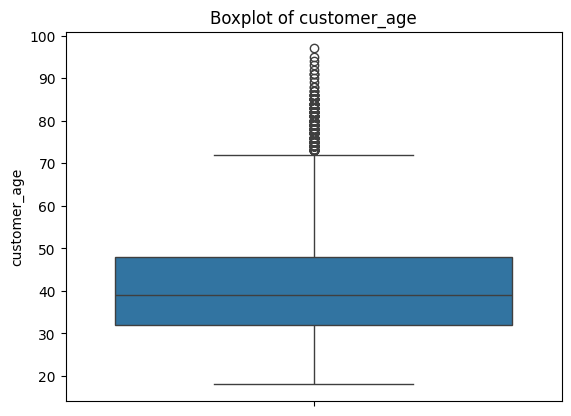

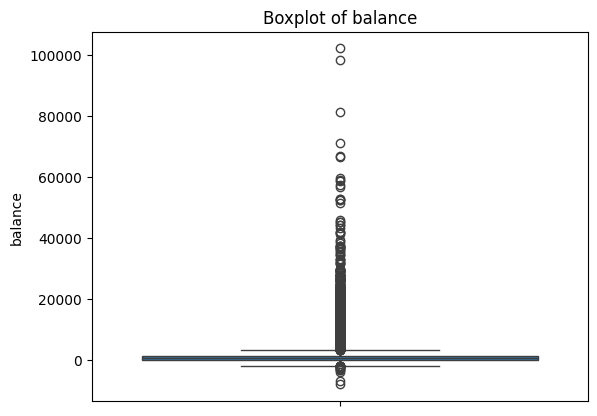

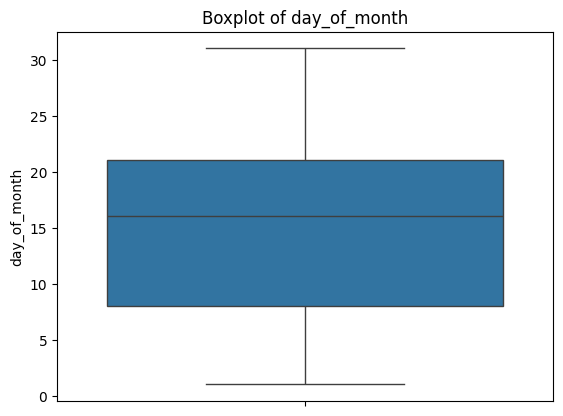

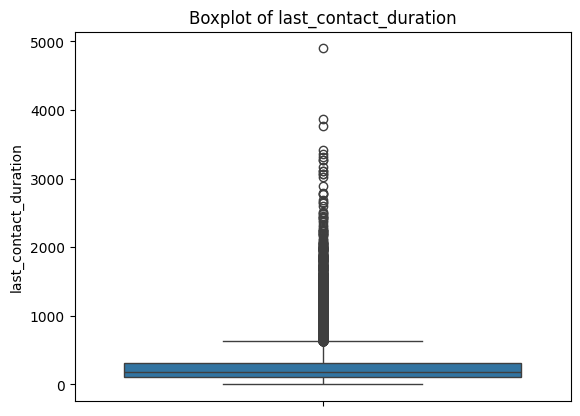

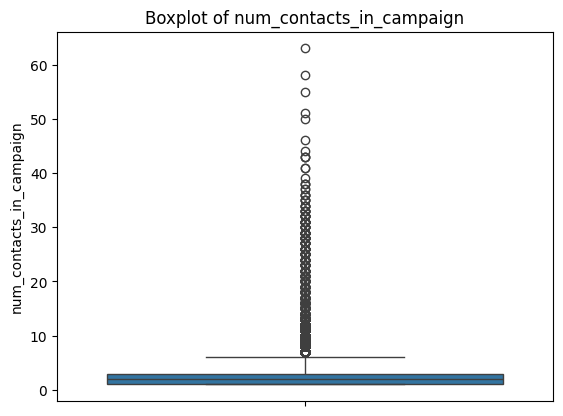

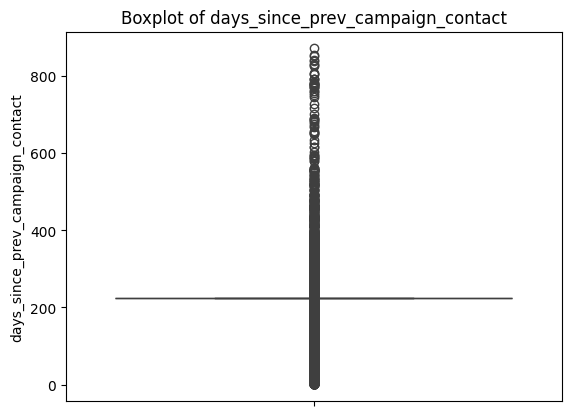

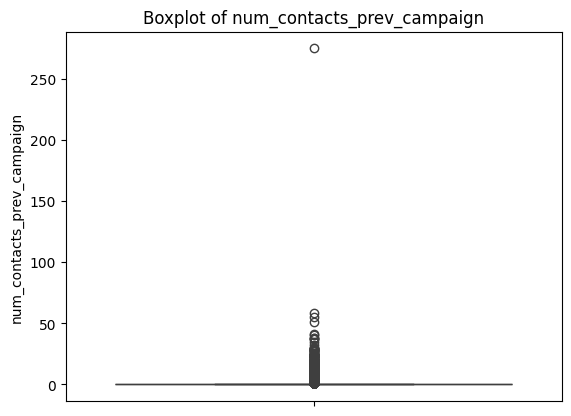

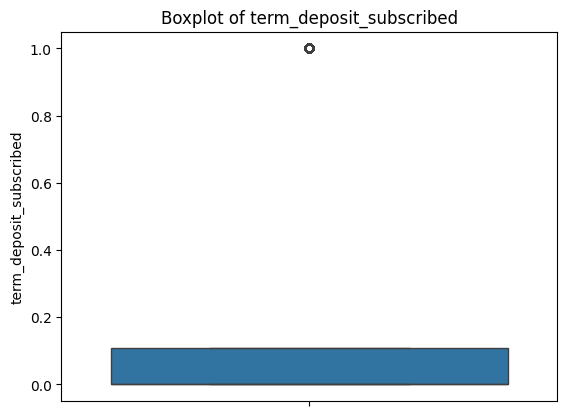

In [11]:
print("\nOutliers Before Handling:")
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [12]:
for column in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, column)


Outliers After Handling:


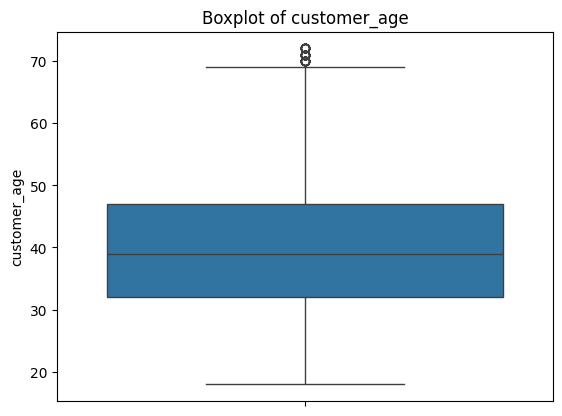

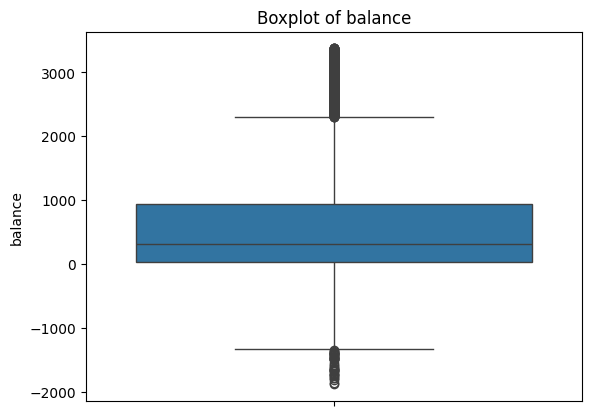

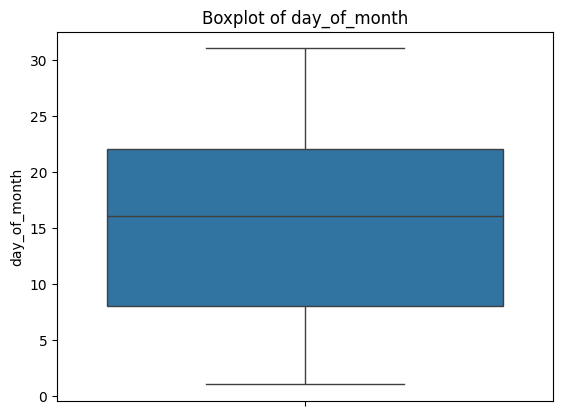

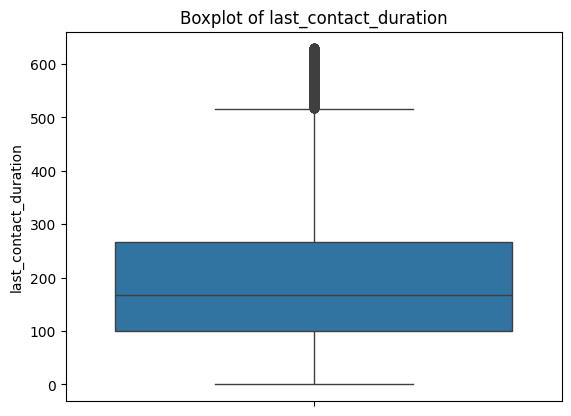

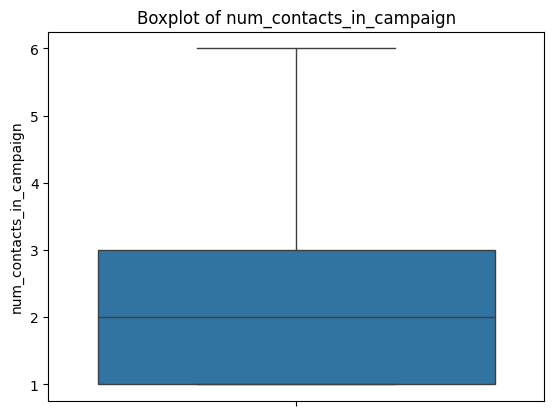

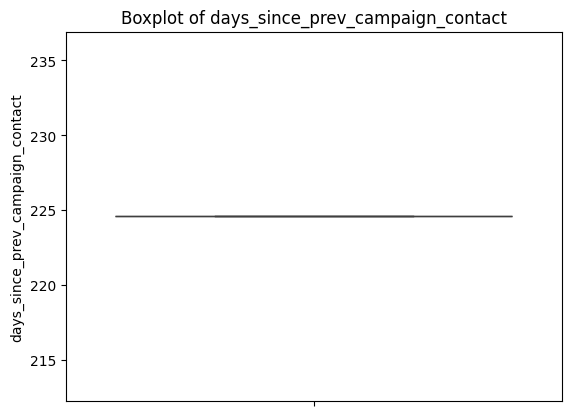

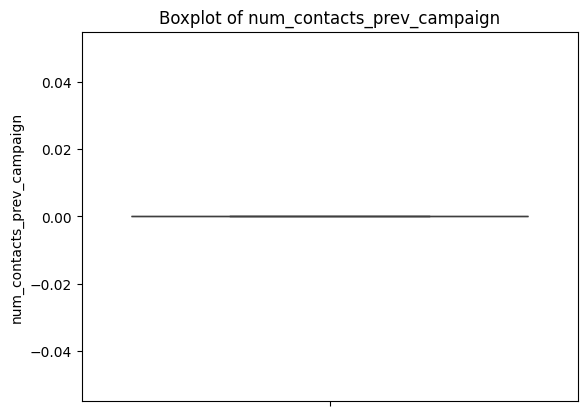

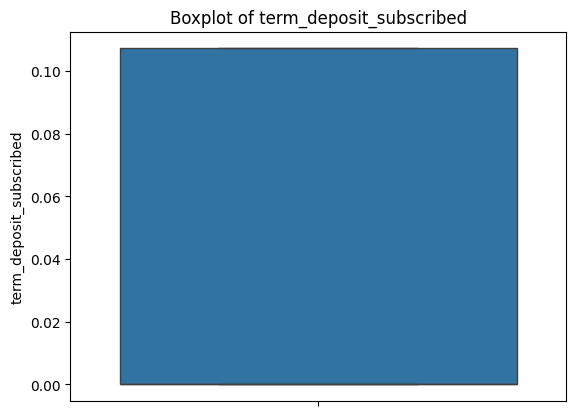

In [13]:
print("\nOutliers After Handling:")
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Exploratory Data Analysis (EDA)



Distribution of Important Features:


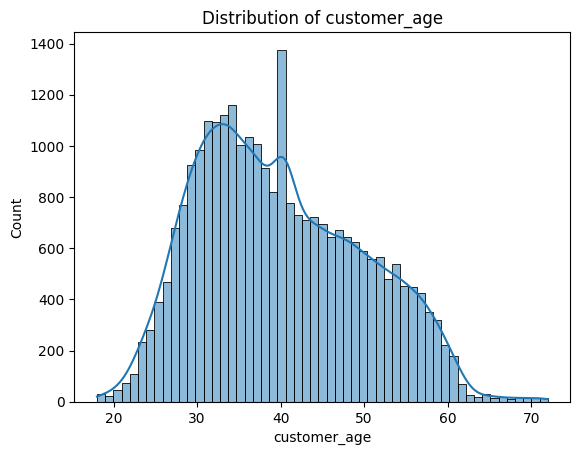

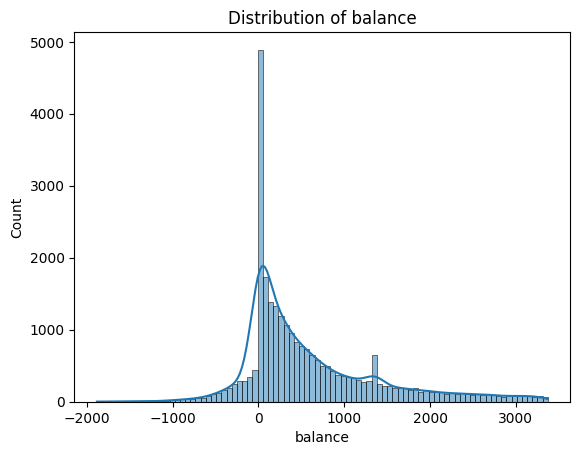

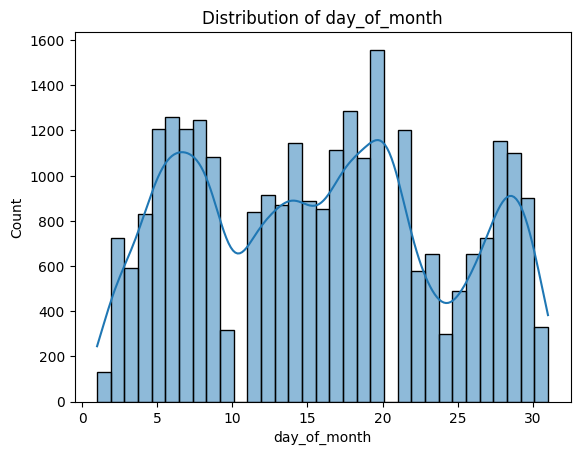

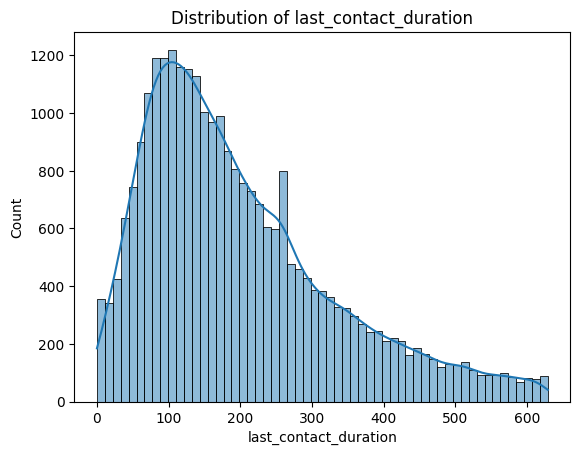

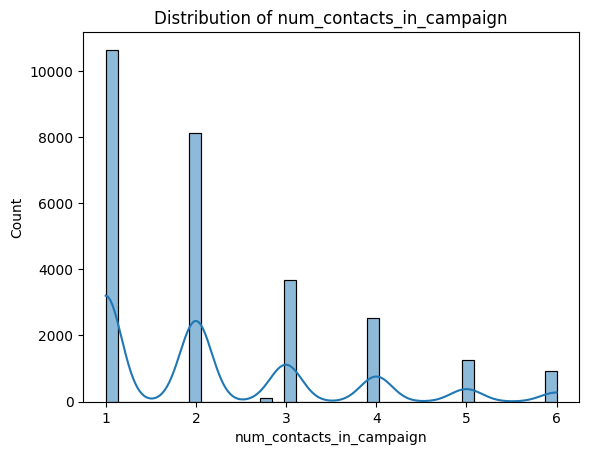

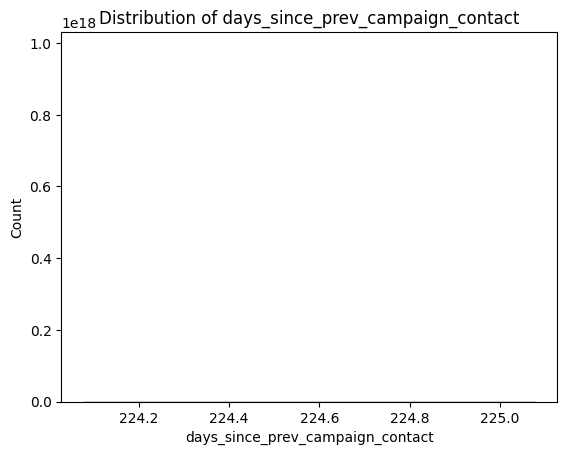

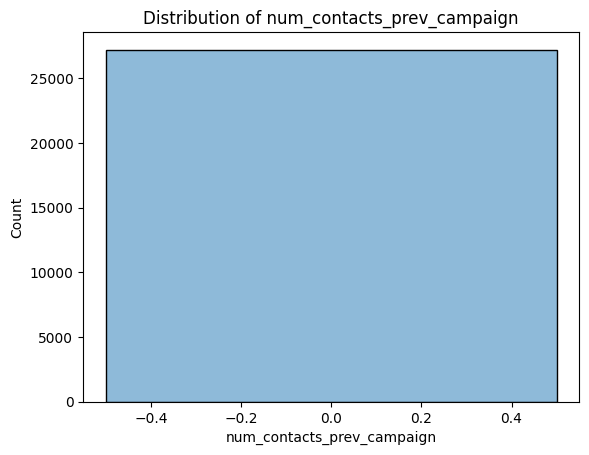

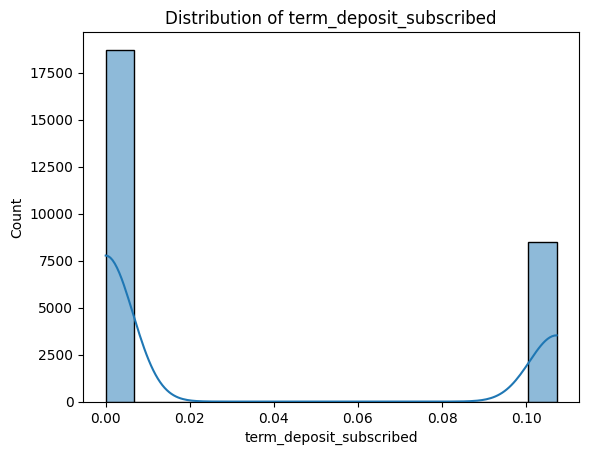

In [14]:

print("\nDistribution of Important Features:")
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Encoding

In [15]:
# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

## **Week 2: Clustering**

## Feauture selection

In [16]:
# Feature Selection: Identify relevant features for clustering
features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[features]

In [17]:
X.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

In [18]:
X.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,285.0,26,303.0,4.0,224.577692,0,0.0
2,46.0,656.0,5,101.0,4.0,224.577692,0,0.0
3,34.0,2.0,20,127.0,3.0,224.577692,0,0.0
4,41.0,1352.0,13,49.0,2.0,224.577692,0,0.0
7,37.0,650.0,26,210.0,1.0,224.577692,0,0.0


## Scaling

In [19]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Using Elbow Method

In [20]:
# Finding the optimal number of clusters using the elbow method for K-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

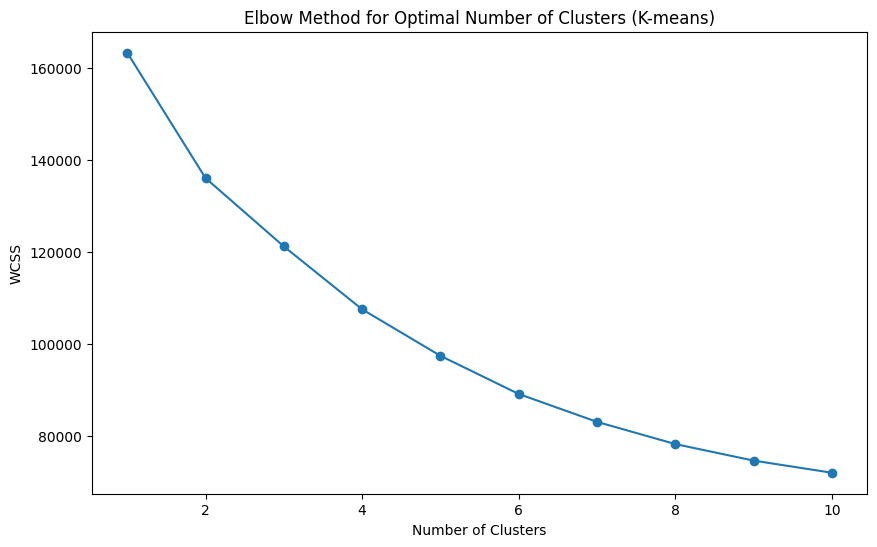

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Finding the optimal number of clusters using silhouette score

In [22]:
# Finding the optimal number of clusters using silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))

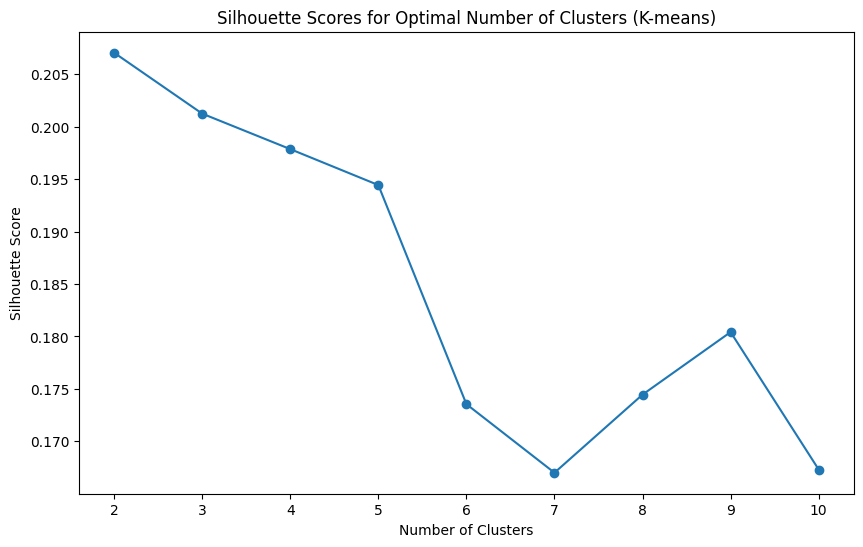

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Choosing the optimal number of clusters

In [24]:
# Choosing the optimal number of clusters based on the above methods
optimal_clusters = 4  # Replace with the chosen number of clusters based on the above plots


In [25]:
# K-means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [26]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [27]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

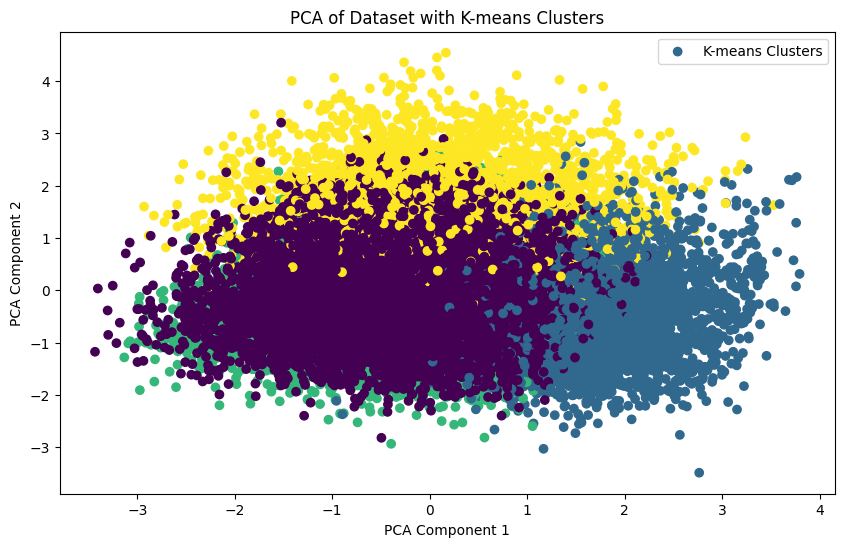

In [28]:
# Plotting the PCA graph with clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='K-means Clusters')
plt.title('PCA of Dataset with K-means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

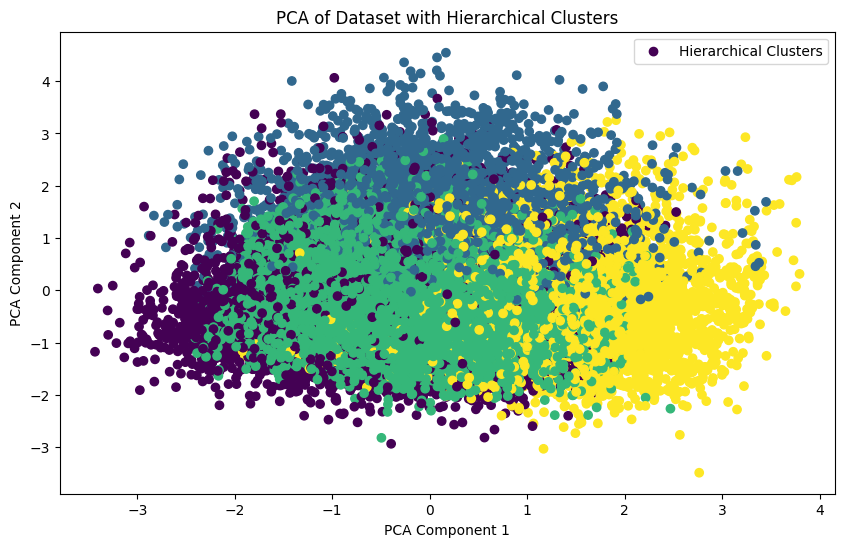

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', label='Hierarchical Clusters')
plt.title('PCA of Dataset with Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [30]:
# Comparing K-means and Hierarchical Clustering using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

In [31]:
print(f"Silhouette Score for K-means: {kmeans_silhouette}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

Silhouette Score for K-means: 0.19785298997851655
Silhouette Score for Hierarchical Clustering: 0.1428540905949295


In [32]:
# Displaying the PCA dataframe
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
print("\nPCA DataFrame:")
print(pca_df.head())


PCA DataFrame:
       PCA1      PCA2
0  0.925861 -1.610501
1  0.710456  0.611651
2  0.809083 -1.099251
3  0.356204  0.838504
4  0.066949 -0.367710


In [33]:
# Save the PCA results and cluster labels for further analysis
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df_pca = pd.concat([df, pca_df], axis=1)

## **Week 3: Model Training and Visualization**

In [34]:
# K-means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [35]:
# Displaying the cluster assignment result
print("Cluster Assignment Result (first 10 rows):")
print(df[['KMeans_Cluster']].head(10))

Cluster Assignment Result (first 10 rows):
    KMeans_Cluster
0                1
2                1
3                1
4                3
7                2
8                2
9                2
14               2
16               2
18               2


In [36]:
df.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,id_id_10,id_id_1000,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,KMeans_Cluster,Hierarchical_Cluster
0,28.0,285.0,26,303.0,4.0,224.577692,0,0.0,False,False,...,False,False,True,False,False,False,False,False,1,0
2,46.0,656.0,5,101.0,4.0,224.577692,0,0.0,False,False,...,False,False,False,False,False,False,False,False,1,3
3,34.0,2.0,20,127.0,3.0,224.577692,0,0.0,False,False,...,False,False,False,False,True,False,False,False,1,3
4,41.0,1352.0,13,49.0,2.0,224.577692,0,0.0,False,False,...,False,False,False,False,True,False,False,False,3,1
7,37.0,650.0,26,210.0,1.0,224.577692,0,0.0,False,False,...,False,False,False,False,True,False,False,False,2,0


## **Week 4: Segment Interpretation and Customer Cluster Prediction**

In [37]:
# Function to predict the cluster for a new customer
def predict_cluster(new_customer_data, scaler, kmeans_model):
    new_customer_scaled = scaler.transform([new_customer_data])
    return kmeans_model.predict(new_customer_scaled)[0]

In [38]:
# Marketing strategies
marketing_strategies = {
    0: "Offer loyalty rewards and discounts on frequently purchased items.",
    1: "Provide personalized product recommendations and exclusive deals.",
    2: "Focus on high-value products and premium services.",
    3: "Engage with targeted email campaigns and seasonal promotions."
}

In [40]:
# Example usage
new_customer_data = [28, 285, 26, 303,4,224.577,0,0]  # Replace with new customer data
new_customer_cluster = predict_cluster(new_customer_data, scaler, kmeans)

In [41]:
print(f"The new customer belongs to Cluster {new_customer_cluster}.")
print(f"Recommended Marketing Strategy: {marketing_strategies[new_customer_cluster]}")


The new customer belongs to Cluster 1.
Recommended Marketing Strategy: Provide personalized product recommendations and exclusive deals.


In [42]:
# Segment Interpretation
print("\nCluster Descriptions:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())


Cluster Descriptions:

Cluster 0:
       customer_age      balance  day_of_month  last_contact_duration  \
count   6824.000000  6824.000000   6824.000000            6824.000000   
mean      39.365486   399.223661     15.171747             212.009525   
std        9.940381   530.341746      8.330196             138.381584   
min       18.000000 -1883.000000      1.000000               0.000000   
25%       31.000000    20.000000      8.000000             106.000000   
50%       38.000000   256.000000     15.000000             178.000000   
75%       47.000000   682.250000     21.000000             288.000000   
max       72.000000  2099.000000     31.000000             629.000000   

       num_contacts_in_campaign  days_since_prev_campaign_contact  \
count               6824.000000                       6824.000000   
mean                   1.879226                        224.577692   
std                    0.948598                          0.000000   
min                    1.000000

Summary
Week 1: Data preprocessing including handling missing values for both numeric and categorical data, dealing with outliers, performing exploratory data analysis (EDA), and encoding categorical features.

Week 2: Clustering algorithm selection, finding the optimal number of clusters, data scaling, and dimensionality reduction. Compared K-means and Hierarchical Clustering, visualized results with PCA.

Week 3: Implemented model training with K-means and Hierarchical Clustering, assigned clusters, and visualized the results.

Week 4: Analyzed customer segments, developed marketing strategies, predicted clusters for new customers, and recommended personalized marketing strategies.